In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import copy
from numpy.linalg import norm
sns.set_theme()

# Общий вид краевой задачи:
# k * u_xx + p * u_x + q * u = f

# Общий вид граничных условий:
# alpha0 * u(a) + alpha1 * u'(a) = alpha
# beta0 * u(b) + beta1 * u'(b) = beta

In [2]:
def tridiagonal(n):
    h = (b-a)/n
    x = [a + i*h for i in range(n+1)]
    alpha_temp = [0 for _ in range(n+1)]
    beta_temp = [0 for _ in range(n+1)]
    gamma_temp = [0 for _ in range(n+1)]
    u = [0 for _ in range(n+1)]
    gamma_temp[0] = h*alpha0-alpha1
    alpha_temp[0] = -alpha1/gamma_temp[0]
    beta_temp[0] = h*alpha
    for i in range(1, n):
        a_i = 2*k(x[i]) - h*p(x[i])
        b_i = -4*k(x[i]) + 2*h*h*q(x[i])
        c_i = 2*k(x[i]) + h*p(x[i])
        d_i = 2*h*h*f(x[i])
        gamma_temp[i] =  b_i + a_i*alpha_temp[i-1]
        alpha_temp[i] = - c_i / gamma_temp[i]
        beta_temp[i] = (d_i - a_i * beta_temp[i-1])/gamma_temp[i]
    u[n] = beta_temp[n]
    for i in range(n-1, -1, -1):
        u[i] = alpha_temp[i]*u[i+1] + beta_temp[i]
    return np.matrix(u)

In [3]:
# def grid(k, p, q, f, a, b, alpha0, alpha1, A_p, beta0, beta1, B_p):
def grid(epsilon):
    n = 10
    r = 2
    p = 1
    v2 = tridiagonal(n)
    n_list = []
    delta_list = []
    while True:
        v1 = copy(v2)
        n *= r
        v2 = tridiagonal(n)
        delta = np.matrix(np.zeros((1, n+1)))
        for i in range(0, v2.shape[1], 2):
            delta[0, i] = (v2[0, i] - v1[0, round(i/2)]) / (r ** p - 1)
        for i in range(1, v2.shape[1], 2):
            delta[0, i] = (delta[0, i-1] + delta[0, i+1])/2
        delta_list.append(norm(delta))
        n_list.append(n)
        if norm(delta) < epsilon:
            v2+=delta
            break
    return n_list, delta_list

Text(0.5, 1.0, 'Пример 15.1 из Амосова, Дубинской')

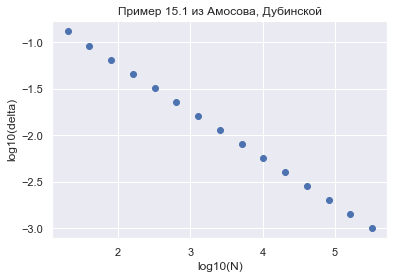

In [4]:
k = lambda x: -1
p = lambda x: 0
q = lambda x: x**2
f = lambda x: (np.pi**2/4+x**2)*np.cos(np.pi*x/2)
a, b = 0, 1
alpha0, alpha1, alpha = 1, 0, 1
beta0, beta1, beta = 1, 0, 0

x1, y1 = grid(10**-3)

plt.scatter(np.log10(x1), np.log10(y1))
plt.xlabel('log10(N)')
plt.ylabel("log10(delta)")
plt.title('Пример 15.1 из Амосова, Дубинской')

Text(0.5, 1.0, 'Вариант 20 из методички Пакулиной')

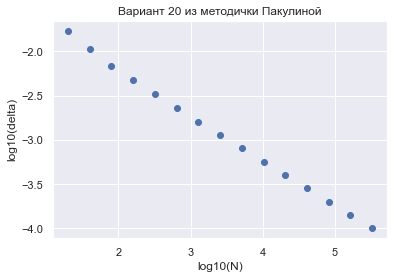

In [5]:
k = lambda x: (7+x)/(-8+3*x)
p = lambda x: 1-x/3
q = lambda x: np.log(3+x)/3
f = lambda x: (1+x)/2
a, b = -1, 1
alpha0, alpha1, alpha = -3, 1, 0
beta0, beta1, beta = 0, 1, 0

x1, y1 = grid(10**-4)
plt.scatter(np.log10(x1), np.log10(y1))
plt.xlabel('log10(N)')
plt.ylabel("log10(delta)")
plt.title('Вариант 20 из методички Пакулиной')